In [2]:
# To upload the file on colab
from google.colab import files
uploaded = files.upload()

Saving housing - housing.csv to housing - housing.csv


 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
  Descriptive statistics:


<Figure size 1200x800 with 0 Axes>

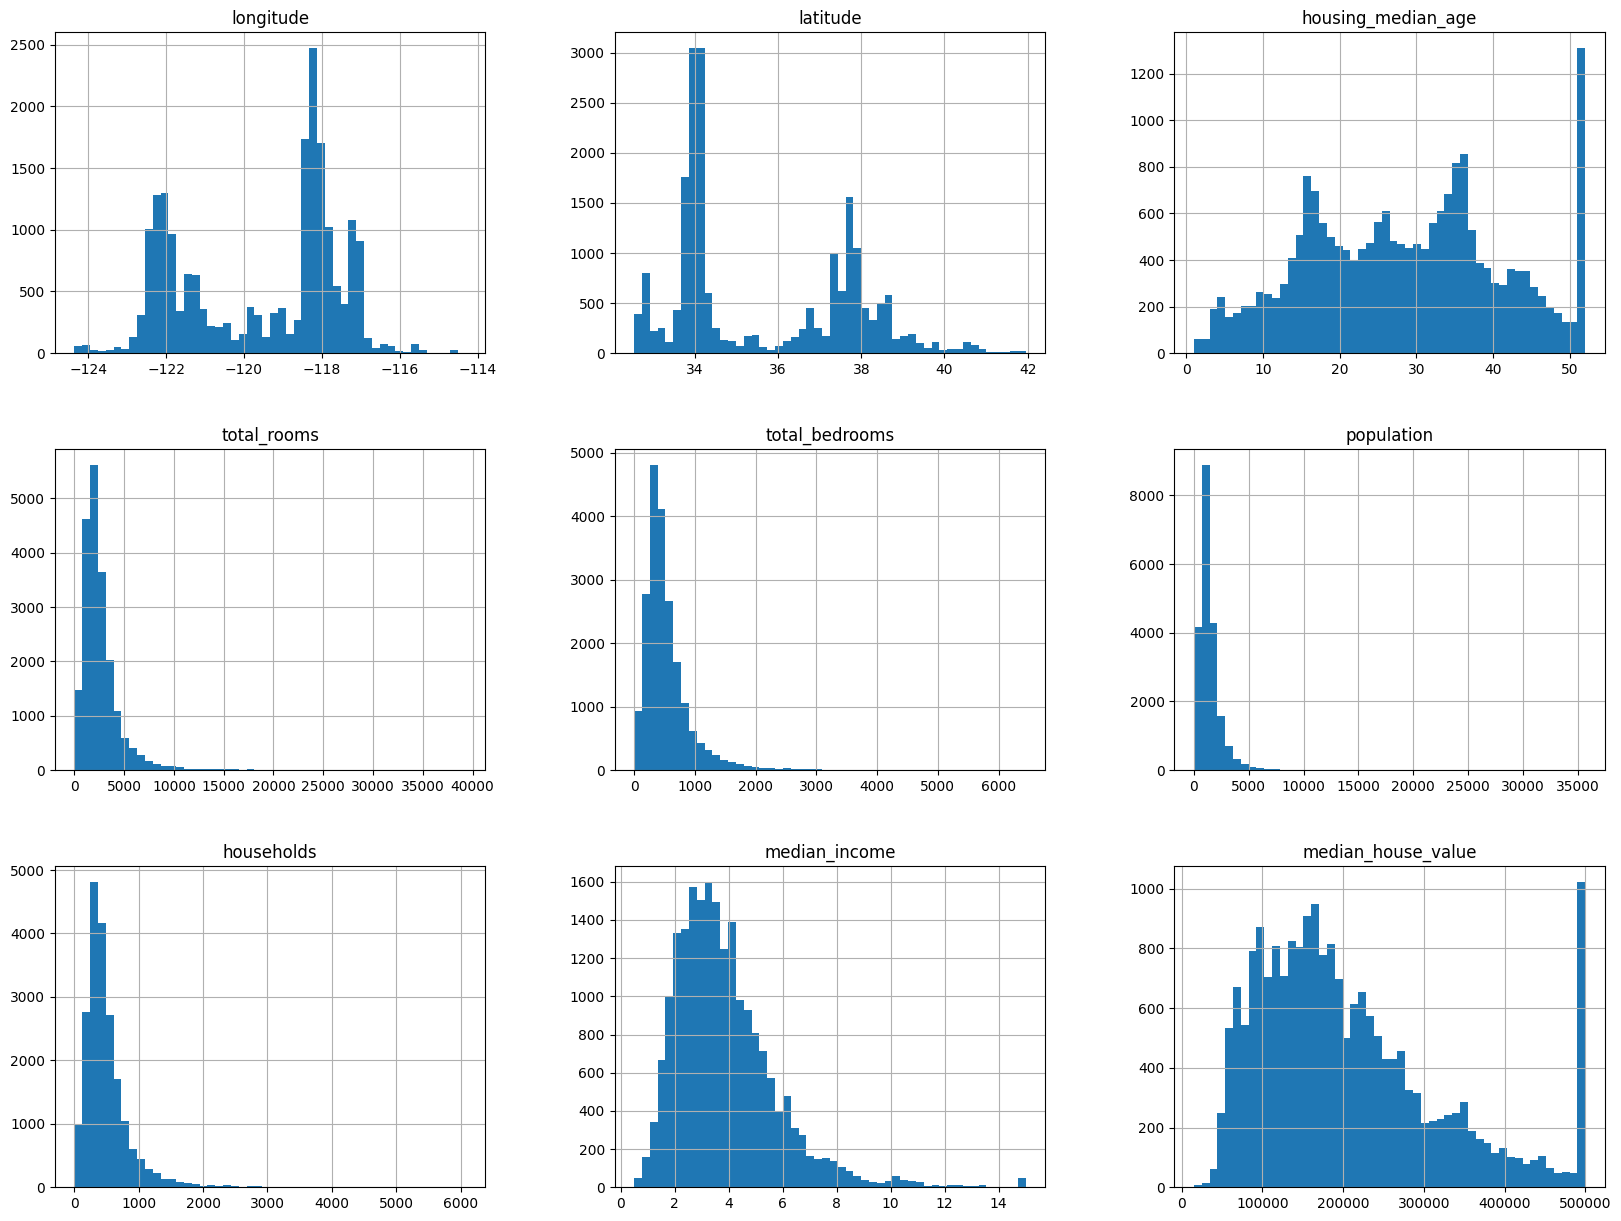

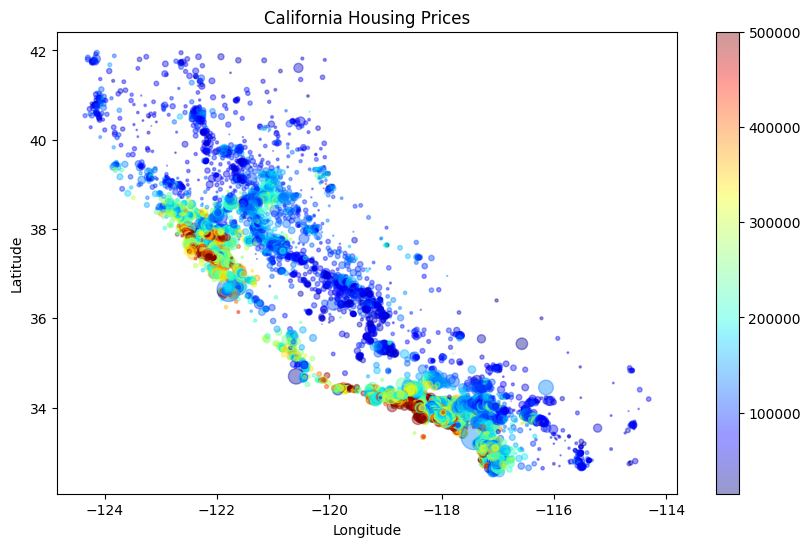

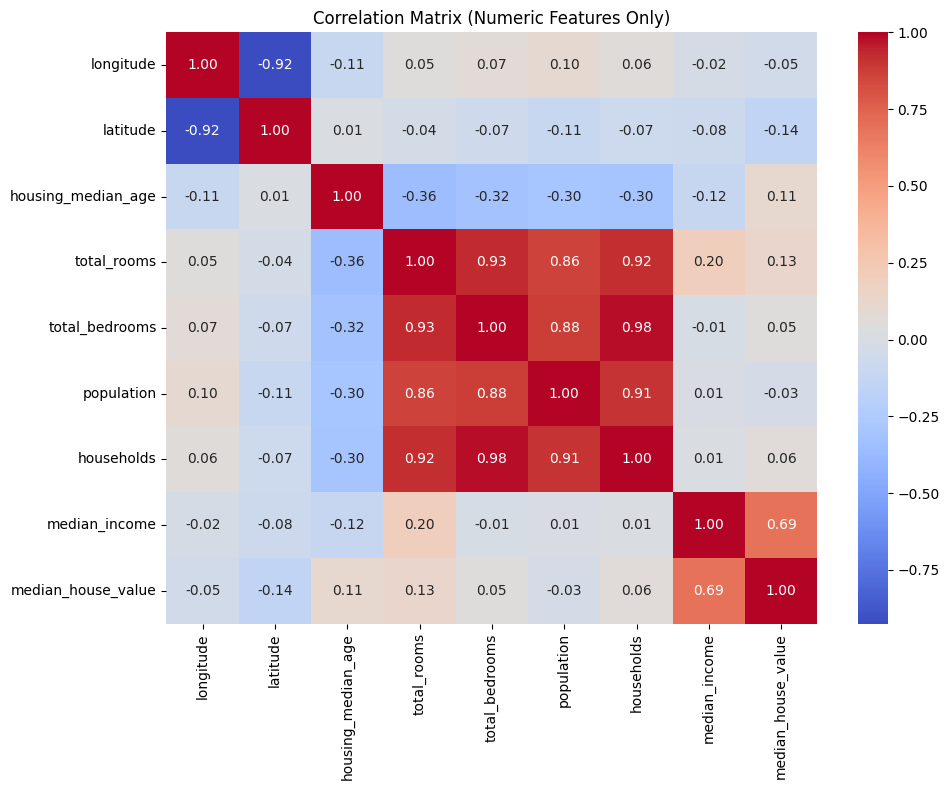

Mean Squared Error:4802173538.60
Root Mean Squared Error:69297.72
R-squared:0.6488


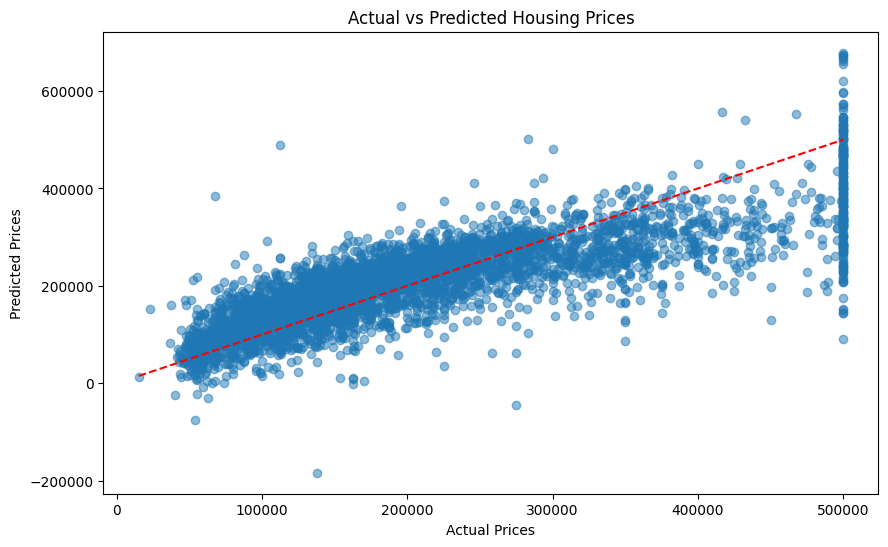


Feature Importance:
                       feature     importance
9       ocean_proximity_ISLAND  213653.374463
7                median_income   39277.083020
11  ocean_proximity_NEAR OCEAN    3166.477128
2           housing_median_age    1081.364206
4               total_bedrooms     103.004042
6                   households      43.142725
3                  total_rooms      -6.322146
5                   population     -36.409751
10    ocean_proximity_NEAR BAY   -6232.416876
1                     latitude  -25657.807543
0                    longitude  -27108.746321
8       ocean_proximity_INLAND  -39240.217778


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('housing - housing.csv')
# Explore the data
data
print(" Dataset info:")
data.info()
print("  Descriptive statistics:")
data.describe()
# Check for missing values
data.isnull().sum()
# Handle missing values
data.dropna(inplace=True)
# Visualize the data
plt.figure(figsize=(12, 8))
# Histogram for numerical features
data.hist(bins=50, figsize=(20, 15))
plt.show()
# Geographical data visualization
plt.figure(figsize=(10, 6))
plt.scatter(data.longitude, data.latitude, alpha=0.4,
            s=data.population/100, c=data.median_house_value, cmap='jet')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.show()
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.tight_layout()
plt.show()
# Prepare data
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error:{mse:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")
print(f"R-squared:{r2:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.coef_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)